In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split

#Para la regresión lineal
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

#Para árbol de regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# Solucion Reto
## 1. Análisis exploratorio
### 1.1 Integralidad de la información

In [205]:
data = pd.read_csv(r"C:\Users\Usuario\Ciencia de datos\MLPython\python-ml-course-master\datasets\data_prueba", sep ='\t')

Con la finalidad de encontrar nuestra variable objetivo y poder encontrar la demanda diaria, procedemos a transformar la tabla de manera que, agrupado por terminal y por día de la semana, podamos ver cuantas operaciones realiza en un día.

se expandirá la tabla de manera que pueda saber también a que franja horaria pertenece

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775466 entries, 0 to 775465
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   fecha       775466 non-null  object
 1   idTerminal  775466 non-null  int64 
 2   oper        775466 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 17.7+ MB


El primer paso que realizo es un análisis de los datos, entendiendo de manera adecuada la información que contiene cada una de als columnas, es necesario ajustar el tipo de variable de cada feature para que sea correspondiente con la naturaleza de la columna.

En este caso, la variable fecha, correspondiente a la fecha y hora en la cual se tomó el registro debería estar en formato datetime, IdTerminal, que corresponde a una identificación debería ser tipo object y oper, correspondiente al tipo de operación realizada, también debería ser tipo object.

Además, se creará la columna que indique a que día de la semana corresponde y a que franja horaria corresponde

In [207]:
new = data["fecha"].str.split(" ", n = 1, expand = True) #division de la columna de fecha para obtener fecha y hora
data["fecha1"] = new[0] # Creación columna de fecha
data["fecha"] = pd.to_datetime(data["fecha"]) #transformación de formato de columna a fecha

data['hora'] = data['fecha'].dt.hour # Encontrar la hora, sin minutos ni segundos
#Creación de columna de franja horaria
conditions = [
    (data['hora'] <= 5),
    (data['hora'] > 5) & (data['hora'] <= 11),
    (data['hora'] > 11) & (data['hora'] ) <= 17, 
    (data['hora'] > 17)]
values = ['madrugada', 'manana', 'tarde', 'noche']
data['Franja_horaria'] = np.select(conditions, values)


data["fecha1"] =  pd.to_datetime(data["fecha1"]) #  transformación de columna de fecha en formato fecha
data['Dia_de_semana'] = data['fecha'].dt.day_name() # encontrar día de la semana


convert_dict ={"idTerminal" : object,
               "oper": object}
data[["idTerminal", "oper"]] = data[["idTerminal", "oper"]].astype(convert_dict)

data.drop(["hora"], axis= 1, inplace=True)
data.drop(["fecha"], axis=1, inplace =True)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775466 entries, 0 to 775465
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idTerminal      775466 non-null  object        
 1   oper            775466 non-null  object        
 2   fecha1          775466 non-null  datetime64[ns]
 3   Franja_horaria  775466 non-null  object        
 4   Dia_de_semana   775466 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 29.6+ MB


En este punto además es necesario conocer si existen datos nulos en el dataset

In [209]:
data.isnull().sum()

idTerminal        0
oper              0
fecha1            0
Franja_horaria    0
Dia_de_semana     0
dtype: int64

Como se puede obervar, no existen datos nulos en el dataset, por lo tanto, no tendremos que aplicar ninguna transformación de datos para solcionar este problema.

In [210]:
# Explorando los primeros 50 datos para comprobar la integralidad
data.head(50)

,idTerminal,oper,fecha1,Franja_horaria,Dia_de_semana
0,1828,0,2017-01-31,manana,Tuesday
1,1828,1,2017-01-31,manana,Tuesday
2,1828,1,2017-01-31,manana,Tuesday
3,1828,1,2017-01-31,manana,Tuesday
4,1828,1,2017-01-31,manana,Tuesday
5,1593,0,2017-01-31,manana,Tuesday
6,1593,1,2017-01-31,manana,Tuesday
7,1593,1,2017-01-31,manana,Tuesday
8,1746,0,2017-01-31,manana,Tuesday
9,1593,1,2017-01-31,manana,Tuesday


In [211]:
# Exploración de los últimos 50 datos para comprobar la integralidad
data.tail(50)

,idTerminal,oper,fecha1,Franja_horaria,Dia_de_semana
775416,1971,0,2017-05-31,tarde,Wednesday
775417,1980,0,2017-05-31,tarde,Wednesday
775418,1574,0,2017-05-31,tarde,Wednesday
775419,1574,0,2017-05-31,tarde,Wednesday
775420,1971,3,2017-05-31,tarde,Wednesday
775421,1971,0,2017-05-31,tarde,Wednesday
775422,1980,0,2017-05-31,tarde,Wednesday
775423,1574,0,2017-05-31,tarde,Wednesday
775424,1980,0,2017-05-31,tarde,Wednesday
775425,1574,1,2017-05-31,tarde,Wednesday


### 1.2 Entendiendo el sistema
En este caso en particular, queremos conocer como se comportan en el tiempo la cantidad de operaciones, por fecha, a demás conocer como se comportan las operaciones por terminal y cuantas operaciones se hacen por tipo de operacion. El entendimiento correcto del sistema nos ayudará a encaminar de mejor manera el modelo


(array([736361., 736375., 736389., 736403., 736420., 736434., 736450.,
        736464., 736481.]),
 <a list of 9 Text major ticklabel objects>)

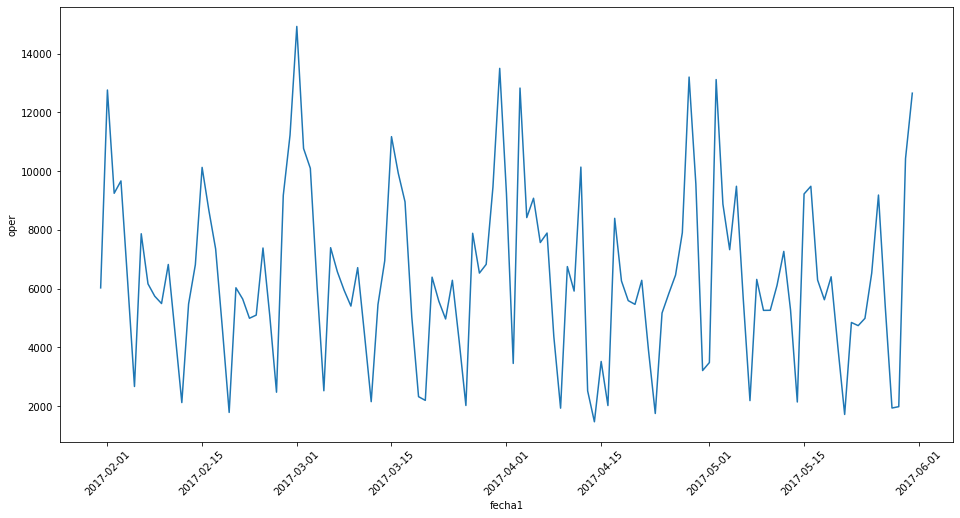

In [212]:
plt.figure(figsize=(16,8))
groupedbydate = data.groupby(["fecha1"]).count()
sns.lineplot(x=groupedbydate.index, y= "oper", data=groupedbydate)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

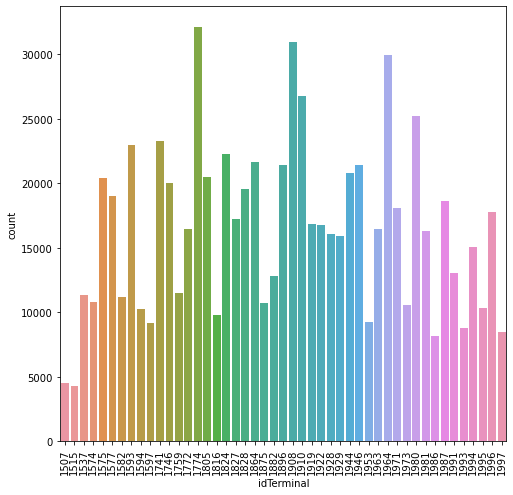

In [213]:
plt.figure(figsize=(8,8))
sns.countplot(x="idTerminal", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

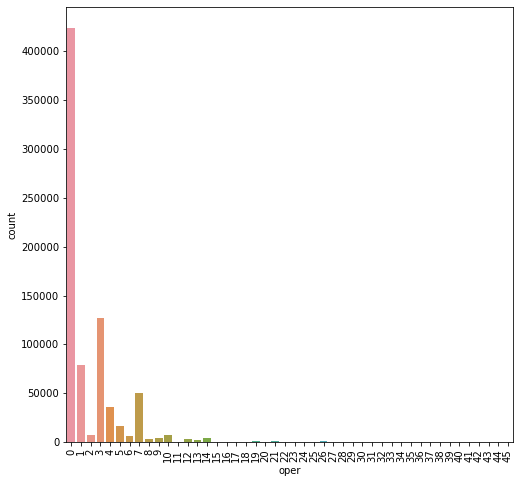

In [214]:
plt.figure(figsize=(8,8))
sns.countplot(x="oper", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

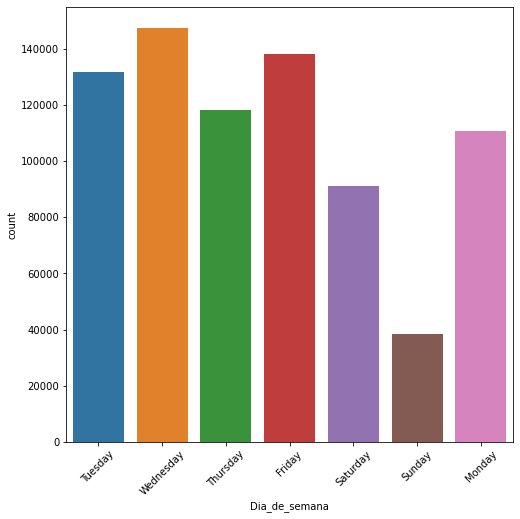

In [215]:
plt.figure(figsize=(8,8))
sns.countplot(x="Dia_de_semana", data=data)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

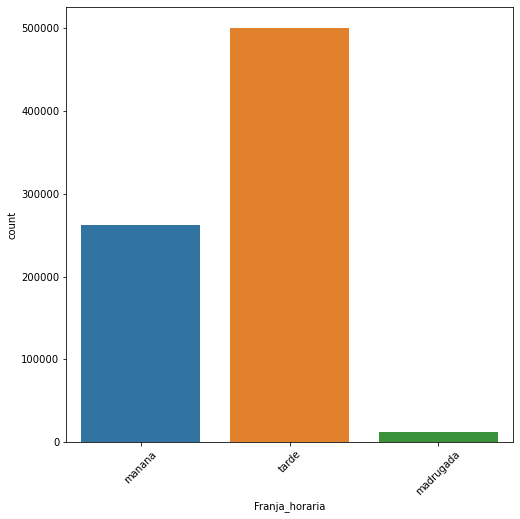

In [216]:
plt.figure(figsize=(8,8))
sns.countplot(x="Franja_horaria", data=data)
plt.xticks(rotation=45)

En las gráficas se puede observar la distribución de los datos por terminal, por día de la semana, por franja horaria y la frecuencia con la que se realiza cada tipo de operación, además, una linea de tiempo que nos deja ver con claridad los días para los cuales la cantidad de operaciones es baja y donde están los picos para dicha variable.

Se puede observar que los picos más altos en la cantidad de operaciones están cerca de los principios o fines de mes, entre el 27 y el 3 de cada mes respectivamente, además, también hay picos significativamente altos cerca de los 15. Debido a este comportamiento y por la naturaleza del problema, podemos inferir que la cantidad de operaciones esta directamente relacionada con las fechas de pago salarial para los trabajadores colombianos.

#### Resumen diagnostico del dataset:
* El contenido del dataset es de buena calidad, no tiene valores vacíos, tiene una buena cantidad de datos,el cual podríamos intentar robostecer por medio de un modelo de DL o por métodos de ensamblaje, esto debe reevaluarse después de la trasnformación de datos.
* Por la manera en la que decidí enfocar el problema, aún no tenemos con claridad una variaable objetivo, esta la lograré agrupando por día de la semana, franja horaria y por terminal, esto nos dará con mejor claridad un conteo de operaciones para cada una de las condiciones y nos permitirá llegar con mayor precisión a un resultado satisfactorio.
* Después de dicha transformación se realizará un nuevo análisis gráfico que nos permita tenemer mayor claridad sobre el problema que enfrentamos.

### 1.3. Análisis gráfico y de correlación

In [217]:
# En este punto ya no necesitamos la columna de fecha, pues esta no puede ser introducida en un modelo
data.drop(["fecha1"], axis=1, inplace=True)
data.head()

,idTerminal,oper,Franja_horaria,Dia_de_semana
0,1828,0,manana,Tuesday
1,1828,1,manana,Tuesday
2,1828,1,manana,Tuesday
3,1828,1,manana,Tuesday
4,1828,1,manana,Tuesday


In [218]:
# En este punto hacemos el cambio de variables de manera que podamos generar nuestra variable objetivo "cantidad de operaciones"
dataNew = data.groupby(["idTerminal","Dia_de_semana","Franja_horaria"]).count()
dataNew.reset_index(inplace=True)
dataNew.columns =["idTerminal", "Dia_de_semana", "Franja_horaria", "Cantidad_operaciones"]
dataNew.head()


,idTerminal,Dia_de_semana,Franja_horaria,Cantidad_operaciones
0,1507,Friday,manana,252
1,1507,Friday,tarde,458
2,1507,Monday,manana,331
3,1507,Monday,tarde,434
4,1507,Saturday,manana,258


In [219]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   idTerminal            906 non-null    int64 
 1   Dia_de_semana         906 non-null    object
 2   Franja_horaria        906 non-null    object
 3   Cantidad_operaciones  906 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 28.4+ KB


In [220]:
#Nuevamente debemos cambiar el idTerminal a una variable de tipo object
dataNew["idTerminal"] = dataNew["idTerminal"].astype(object)

dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   idTerminal            906 non-null    object
 1   Dia_de_semana         906 non-null    object
 2   Franja_horaria        906 non-null    object
 3   Cantidad_operaciones  906 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 28.4+ KB


Ya que para este caso en particular contamos solamente con variables categoricas no es viable llevar a cabo un análisis de correlación, sin embargo, podemos encontrar por medio de un análisis ANOVA, si la cantidad de operaciones está linealmente relacionada con las variables categoricas Dia_de_semana, idTerminal, Franja_horaria

### 1.3.1 Análisis ANOVA

In [221]:
import statsmodels.api as sm
from statsmodels.formula.api import ols #Ordinary linear squares

anova_alcohol=ols('Cantidad_operaciones ~ C(Dia_de_semana)+idTerminal+Franja_horaria', data=dataNew).fit()
sm.stats.anova_lm(anova_alcohol)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dia_de_semana),6.0,6.359364e+07,1.059894e+07,69.272536,3.183511e-70
idTerminal,46.0,8.791357e+07,1.911165e+06,12.490987,1.127319e-67
Franja_horaria,2.0,3.257716e+08,1.628858e+08,1064.588865,2.483056e-232
Residual,851.0,1.302060e+08,1.530035e+05,NaN,NaN


#### Conclusiones del análisis ANOVA:
Como se puede observar, todas las variables cuentan con un p valor lo suficientemente pequeño, definiendo un intervalo de confianza de 5%, teniendo en cuenta que todas las variables cumplen con el intervalo de confianza, todas deberían ser tenidas en cuenta en el modelo

### 1.3.2 Análisis Gráfico:

In [222]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(dataNew, x='idTerminal', y='Franja_horaria', z='Cantidad_operaciones')
#fig.write_html("animacion1_3D.html")
fig.show()

In [223]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(dataNew, x='idTerminal', y='Dia_de_semana', z='Cantidad_operaciones')
#fig.write_html("animacion1_3D.html")
fig.show()

In [224]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter_3d(dataNew, x='Dia_de_semana', y='Franja_horaria', z='Cantidad_operaciones')
#fig.write_html("animacion1_3D.html")
fig.show()

#### Conclusiones de análisis en 3D :
* Como se puede ver en el los gráficos en 3D, efectivamente es muy importante la franja horaria, siendo la tarde la franja horaria de mayor actividad y la madrugada, la franja horaria de menor actividad.
* El día de la semana también es una variable que tiene mucho peso sobre el resultado, pues se puede evidenciar que la mayor actividad se concentra en los días martes, miercoles y viernes, y la menor actividad se genera en los días sábado y domingo.

Con base en el análisis ANOVA y los gráficos, apoyado además en la naturaleza del sistema, probaré modelos de regresión lineal, un árbol de regresión y un bosque de regresión.

### 1.4 Análisis de valores atípicos
El comportamiento de las variables de este fenómeno está directamente ligado con la cantidad de operaciones realizadas en un día, eliminar los valores atípicos en la variable numérica Cantidad_operaciones, solamente nos evitará poder predecir valores que estén por fuera del rango intercuartil, a demás, por la poca cantidad de datos que tenemos luego de la agrupación, considero poco conveniente eliminar estos datos.

Para demostrar esto, eliminaré los outliers por medio de la técnica del rango intercuartil y comprobaré como se ve afectada la cantidad de datos para evaluar la conveniencia de esta eliminación.


**NOTA:** La variable objetivo nunca es sujeto de tratamiento de outliers y se hace en este ejemplo a modo de demostración, pero se trabajará con los datos completos.



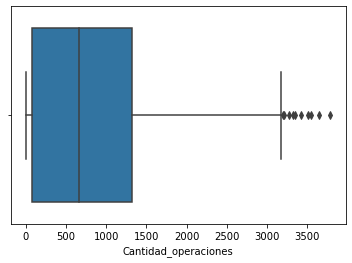

In [225]:
sns.boxplot(dataNew["Cantidad_operaciones"])

#### Sobre los diagramas de caja:
* En el diagrama de caja se evidencian ouliers por regla del rango intercuartil en la variable objetivo

In [226]:
## Definición de la función que removerá los outliers
def outliers_rem(data,column):
    '''Función creada para remover outliers definidos por la regla del rango intercuartil de un dataframe'''
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [227]:
## Removiendo outliers
dataFiltered = outliers_rem(dataNew,'Cantidad_operaciones')

In [228]:
print(f'Cantidad de datos antes de filtrar outliers: {len(dataNew)}')
print(f'Cantidad de datos después de filtrar outliers: {len(dataFiltered)}')
print(f'Se conserva el : {len(dataFiltered)*100/len(dataNew)}% de los datos')

Cantidad de datos antes de filtrar outliers: 906
Cantidad de datos después de filtrar outliers: 896
Se conserva el : 98.8962472406181% de los datos


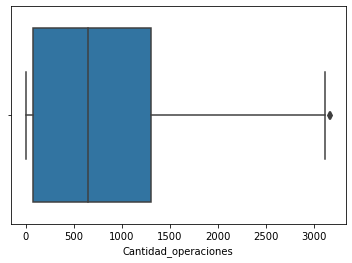

In [229]:
sns.boxplot(dataFiltered["Cantidad_operaciones"])

Debido a la naturaleza de las variables predictoras, nos vemos en el deber de implementar un pipeline de transformación que nos permita utilizar modelos que por naturaleza solo aceptan variables numéricas
## 2. Pipeline de transformación

In [230]:
categories = ['idTerminal', 'Dia_de_semana', 'Franja_horaria']
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(dataNew[category], prefix=category)
    data_new = dataNew.join(cat_dummies)
    dataNew = data_new

In [231]:
dataNew

,idTerminal,Dia_de_semana,Franja_horaria,Cantidad_operaciones,idTerminal_1507,idTerminal_1515,idTerminal_1537,idTerminal_1574,idTerminal_1575,idTerminal_1577,...,Dia_de_semana_Friday,Dia_de_semana_Monday,Dia_de_semana_Saturday,Dia_de_semana_Sunday,Dia_de_semana_Thursday,Dia_de_semana_Tuesday,Dia_de_semana_Wednesday,Franja_horaria_madrugada,Franja_horaria_manana,Franja_horaria_tarde
0,1507,Friday,manana,252,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1507,Friday,tarde,458,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1507,Monday,manana,331,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1507,Monday,tarde,434,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1507,Saturday,manana,258,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1997,Tuesday,madrugada,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
902,1997,Tuesday,manana,600,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
903,1997,Tuesday,tarde,875,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
904,1997,Wednesday,manana,533,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [232]:
dataNew.drop(["idTerminal","Dia_de_semana","Franja_horaria"], axis=1, inplace=True)
dataNew.head()

,Cantidad_operaciones,idTerminal_1507,idTerminal_1515,idTerminal_1537,idTerminal_1574,idTerminal_1575,idTerminal_1577,idTerminal_1582,idTerminal_1593,idTerminal_1594,...,Dia_de_semana_Friday,Dia_de_semana_Monday,Dia_de_semana_Saturday,Dia_de_semana_Sunday,Dia_de_semana_Thursday,Dia_de_semana_Tuesday,Dia_de_semana_Wednesday,Franja_horaria_madrugada,Franja_horaria_manana,Franja_horaria_tarde
0,252,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,458,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,331,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,434,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,258,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [233]:
dataNew.columns

Index(['Cantidad_operaciones', 'idTerminal_1507', 'idTerminal_1515',
       'idTerminal_1537', 'idTerminal_1574', 'idTerminal_1575',
       'idTerminal_1577', 'idTerminal_1582', 'idTerminal_1593',
       'idTerminal_1594', 'idTerminal_1597', 'idTerminal_1741',
       'idTerminal_1746', 'idTerminal_1759', 'idTerminal_1772',
       'idTerminal_1774', 'idTerminal_1805', 'idTerminal_1816',
       'idTerminal_1824', 'idTerminal_1827', 'idTerminal_1828',
       'idTerminal_1864', 'idTerminal_1875', 'idTerminal_1882',
       'idTerminal_1896', 'idTerminal_1908', 'idTerminal_1910',
       'idTerminal_1919', 'idTerminal_1922', 'idTerminal_1928',
       'idTerminal_1929', 'idTerminal_1944', 'idTerminal_1946',
       'idTerminal_1953', 'idTerminal_1963', 'idTerminal_1964',
       'idTerminal_1971', 'idTerminal_1973', 'idTerminal_1980',
       'idTerminal_1981', 'idTerminal_1986', 'idTerminal_1987',
       'idTerminal_1991', 'idTerminal_1993', 'idTerminal_1994',
       'idTerminal_1995', 'idTermin

## 3. Desarrollo de modelos
### 3.1 Selección de los modelos
Desde el análisis gráfico y el análisis ANOVA, se empiezan a perfilar modelos de regresión  que podrían tener el potencial de predecir correctamente la cantidad de operaciones que se va a tener en algún momento, los modelos que se compararán son:
* Árbol de regresión
* Bosque de regresión
* Regresión lineal

Basado en las métricas de evaluación se analizará si con estos modelos se resuelve adecuadamente el problema o si es necesario entrar en comparación otros modelos. Además, basado en estas mismas métricas seleccionaré un modelo sobre el cual ajustar los hiperparámetros.

In [234]:
## Para data sin outliers filtrados
X = dataNew[['idTerminal_1507', 'idTerminal_1515',
       'idTerminal_1537', 'idTerminal_1574', 'idTerminal_1575',
       'idTerminal_1577', 'idTerminal_1582', 'idTerminal_1593',
       'idTerminal_1594', 'idTerminal_1597', 'idTerminal_1741',
       'idTerminal_1746', 'idTerminal_1759', 'idTerminal_1772',
       'idTerminal_1774', 'idTerminal_1805', 'idTerminal_1816',
       'idTerminal_1824', 'idTerminal_1827', 'idTerminal_1828',
       'idTerminal_1864', 'idTerminal_1875', 'idTerminal_1882',
       'idTerminal_1896', 'idTerminal_1908', 'idTerminal_1910',
       'idTerminal_1919', 'idTerminal_1922', 'idTerminal_1928',
       'idTerminal_1929', 'idTerminal_1944', 'idTerminal_1946',
       'idTerminal_1953', 'idTerminal_1963', 'idTerminal_1964',
       'idTerminal_1971', 'idTerminal_1973', 'idTerminal_1980',
       'idTerminal_1981', 'idTerminal_1986', 'idTerminal_1987',
       'idTerminal_1991', 'idTerminal_1993', 'idTerminal_1994',
       'idTerminal_1995', 'idTerminal_1996', 'idTerminal_1997',
       'Dia_de_semana_Friday', 'Dia_de_semana_Monday',
       'Dia_de_semana_Saturday', 'Dia_de_semana_Sunday',
       'Dia_de_semana_Thursday', 'Dia_de_semana_Tuesday',
       'Dia_de_semana_Wednesday', 'Franja_horaria_madrugada',
       'Franja_horaria_manana', 'Franja_horaria_tarde']]
y = dataNew['Cantidad_operaciones']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Se particiona la información en datos de entrenamiento y datos de prueba.

Training = 75% aprox.
Test = 25% aprox.

Se utilizará como variable objetivo 'Cantidad_operaciones'

### 3.2 Desarrollo de regresión lineal
Para la implementación de la regresión lineal se evaluará la importancia de incluir cada una de las variables en el desarrollo del mismo y se comprobará el ranking en el cuales las variables aportan al modelo.

**NOTA:** Las métricas para los modelos seleccionados serán el score y el error cuadratico medio, de esta manera podemos considerar más de un punto de comparación a la hora de decidir cual modelo es más adecuado


In [235]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=61, step=1)
selector = selector.fit(X_train,y_train)

selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Como se puede observar, todas las variables son importantes para el modelo tal como lo habíamos deducido del análisis ANOVA

In [236]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [237]:
lm = LinearRegression().fit(X_train, y_train)

In [238]:
predsLM= lm.predict(X)

In [239]:
dataNew["predsLM"] = predsLM

In [240]:
dataNew[["predsLM", "Cantidad_operaciones"]].head(20)

,predsLM,Cantidad_operaciones
0,168.0,252
1,892.0,458
2,-88.0,331
3,640.0,434
4,-204.0,258
5,520.0,234
6,-652.0,67
7,72.0,121
8,-24.0,233
9,700.0,368


In [262]:
dataNew["lm_error"] = (dataNew["predsLM"]-dataNew["Cantidad_operaciones"])**2
print("Error cuadrático medio: ", np.mean(dataNew["lm_error"]))
print("Score:", lm.score(X_train, y_train))

Error cuadrático medio:  147819.12141280354
Score: 0.7815573352773076


In [263]:
mean_squared_error(y_test,  lm.predict(X_test))

143173.21585903084

### 3.2 Desarrollo del árbol de regresión
Para la implementación del árbol de regresión el parámetro crucial es la profundidad del árbol.Plantearé una serie de profundidades y entrenaré árboles de decisión con estas. Utilizaré el score F1 para entender el desempeño del modelo mientras se va aumentando gradualmente la profundidad.

**NOTA:** Las métricas para los modelos seleccionados serán el score y el error cuadratico medio, de esta manera podemos considerar más de un punto de comparación a la hora de decidir cual modelo es más adecuado


In [243]:
## Entrenamiento de diferentes árboles de decisión con diferente nivel de profundidad

depth = [1, 2, 3, 5, 7, 10, 13, 15, 17, 20, 25, 30, 40, 60]
f1_res = []
for i in depth:
    t = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)
    t_pred = t.predict(X_test)
    f1_res.append((t.score(X_test, y_test)))
f1_res

[0.4169009453390202,
 0.6001841279997185,
 0.6681275834344371,
 0.7103662566146471,
 0.710487991589103,
 0.7341206401466782,
 0.731180813299509,
 0.739163218456329,
 0.7497539094399565,
 0.7807159760406817,
 0.7864538388566598,
 0.7911583680889194,
 0.783478720624568,
 0.7828147033681361]

Como se puede observar, el mejor score se da para una profundidad de 30, es esta la que tomaremos

In [244]:
regtree = DecisionTreeRegressor(max_depth=30).fit(X_train,y_train)

In [245]:
preds = regtree.predict(X)

In [246]:
dataNew["predsDT"] = preds

In [247]:
dataNew[["predsDT", "Cantidad_operaciones"]]

,predsDT,Cantidad_operaciones
0,252.000000,252
1,458.000000,458
2,331.000000,331
3,434.000000,434
4,258.000000,258
...,...,...
901,4.189189,1
902,605.328125,600
903,1494.000000,875
904,1328.800000,533


In [248]:
dataNew["rtree_error"] = (dataNew["predsDT"]-dataNew["Cantidad_operaciones"])**2
print("Error cuadrático medio: ", np.mean(dataNew["rtree_error"]))
print("Score:", regtree.score(X_test, y_test))

Error cuadrático medio:  38096.29659568987
Score: 0.7922401476999458


In [249]:
mean_squared_error(y_test,  regtree.predict(X_test))

130426.50698556528

### 3.3. Desarrollo de Random Forest
En los modelos random forest uno de los parámetros más importantes es, junto con la profundidad, la cantidad de estimadores en el bosque. Plantearé una serie de estimadores y entrenaré modelos Random Forest con estas. No limitaré la profundidad incialmente para tomar un modelo base. Utilizaré el score F1 para entender el desempeño del modelo mientras se va aumentando gradualmente los estimadores.

In [250]:
## Entrenamiento de modelos RF con diferentes cantidades de estimadores
estimators = [20,50,100,200,300,500,1000,5000]
f1_res = []
for i in estimators:
    rf = RandomForestRegressor(max_depth=None, n_estimators=i, oob_score=True).fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    f1_res.append(rf.oob_score_)
f1_res

[0.837649724492802,
 0.8558835949984065,
 0.8583214061475286,
 0.864600545805316,
 0.8662992611916629,
 0.8662259172197928,
 0.865102175936362,
 0.8646162282192242]

Como se puede observar, aumentar el número de arboles no mejora significativamente el desempeño del modelo, por lo tanto, se escogen 50 estimadores para reducir el costo computacional de la implementación del mismo.

In [251]:
forest = RandomForestRegressor(max_depth=None, n_estimators=50, oob_score=True).fit(X_train, y_train)

In [252]:
forest.feature_importances_

array([0.02267603, 0.02143594, 0.00201116, 0.00176059, 0.00280834,
       0.00322876, 0.0013053 , 0.00933392, 0.00349049, 0.0046595 ,
       0.00854403, 0.00388467, 0.00226257, 0.00096618, 0.03037985,
       0.00381334, 0.00292989, 0.00461455, 0.00324115, 0.00356866,
       0.00426708, 0.00124804, 0.00192305, 0.01004736, 0.02747882,
       0.02026057, 0.00112238, 0.00140226, 0.00170985, 0.00149441,
       0.00491041, 0.00529943, 0.00753802, 0.00244274, 0.0180354 ,
       0.00308051, 0.00268255, 0.0165668 , 0.00165981, 0.01123928,
       0.002877  , 0.00160232, 0.00813414, 0.0010428 , 0.00389514,
       0.00645381, 0.00481537, 0.00498364, 0.0061692 , 0.03198546,
       0.13141167, 0.00425668, 0.00228801, 0.01004302, 0.23259116,
       0.05744104, 0.20868586])

In [253]:
rfPred = forest.predict(X)
dataNew["rfPred"] =rfPred

In [257]:
dataNew[["rfPred", "Cantidad_operaciones"]]

,rfPred,Cantidad_operaciones
0,276.36,252
1,496.28,458
2,318.72,331
3,453.92,434
4,295.36,258
...,...,...
901,1.60,1
902,658.84,600
903,1089.96,875
904,944.84,533


In [258]:
dataNew["rf_error"] = (dataNew["rfPred"]-dataNew["Cantidad_operaciones"])**2
print("Error cuadrático medio: ", np.mean(dataNew["rf_error"]))
print("Score:", forest.oob_score_)

Error cuadrático medio:  27932.307001765996
Score: 0.864453292178144


In [259]:
dataNew[["Cantidad_operaciones", "predsLM", "predsDT","rfPred"]].head(40)

,Cantidad_operaciones,predsLM,predsDT,rfPred
0,252,168.0,252.000000,276.36
1,458,892.0,458.000000,496.28
2,331,-88.0,331.000000,318.72
3,434,640.0,434.000000,453.92
4,258,-204.0,258.000000,295.36
5,234,520.0,234.000000,406.92
6,67,-652.0,67.000000,80.52
7,121,72.0,121.000000,191.26
8,233,-24.0,233.000000,266.06
9,368,700.0,368.000000,417.68


In [260]:
## 4. Comparación de modelos

In [ ]:
multiclassComp = pd.DataFrame({
    'Model'       : ['Regresion lineal', 'Arbol de regresion', 'Bosque de regresion'],
    ''